<a href="https://colab.research.google.com/github/9kitsune/lcss/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import csv data file
from google.colab import files
uploaded = files.upload()

Saving 2019-05-0522_00_58.395526.txt to 2019-05-0522_00_58.395526.txt


# Samples: 54476


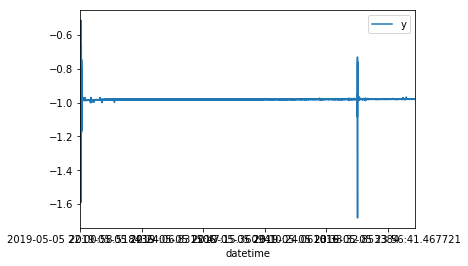

In [21]:
import pandas as pd
import numpy as np
import io

slog = pd.read_csv(io.BytesIO(uploaded['2019-05-0522_00_58.395526.txt']))

#slog = slog.set_index(pd.DatetimeIndex(slog['datetime']))

temp = pd.DatetimeIndex(slog['datetime'])
slog['Date'] = temp.date
slog['Time'] = temp.time

# isolate datetime into dt
time = slog['Time']

# split time from datetime


#slog.resample('15S').mean()

slog.head()

slog.plot(x='datetime', y='y', kind='line')
time.head()
N = np.int(np.prod(time.shape))#length of the array
N
t1 = time[1]
t0 = time[0]
#Fs = 1/pd.Timedelta()  #sample rate (Hz)
#T = 1/Fs;
print("# Samples:",N)


Vibration analysis steps:


1.   prompt user to load csv
2.   load csv
3.   plot all data
4.   perform a simple moving RMS calculation 
5.   plot this followed by a FFT of the entire dataset and plot.

what is FFT?
https://blog.mide.com/vibration-analysis-fft-psd-and-spectrogram


In [15]:
#Determine variables
N = np.int(np.prod(time.shape))#length of the array
#Fs = 1/(time[1]-time[0])  #sample rate (Hz)
#T = 1/Fs;
print("# Samples:",N)

# Samples: 54476


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import tkinter as tk
from tkinter import filedialog
import time
 
#Prompt user for file
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(filetypes=[("Two Column CSV","*.csv")])
print(file_path)
 
#Load Data (assumes two column array
tic = time.clock()
t, x = np.genfromtxt(file_path,delimiter=',', unpack=True)
toc = time.clock()
print("Load Time:",toc-tic)
 
#Determine variables
N = np.int(np.prod(t.shape))#length of the array
Fs = 1/(t[1]-t[0])  #sample rate (Hz)
T = 1/Fs;
print("# Samples:",N)
 
#Plot Data
tic = time.clock()
plt.figure(1)  
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.ylabel('Accel (g)')
plt.title(file_path)
plt.grid()
toc = time.clock()
print("Plot Time:",toc-tic)
 
#Compute RMS and Plot
tic = time.clock()
w = np.int(np.floor(Fs)); #width of the window for computing RMS
steps = np.int_(np.floor(N/w)); #Number of steps for RMS
t_RMS = np.zeros((steps,1)); #Create array for RMS time values
x_RMS = np.zeros((steps,1)); #Create array for RMS values
for i in range (0, steps):
    t_RMS[i] = np.mean(t[(i*w):((i+1)*w)]);
    x_RMS[i] = np.sqrt(np.mean(x[(i*w):((i+1)*w)]**2));  
plt.figure(2)  
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('RMS Accel (g)')
plt.title('RMS - ' + file_path)
plt.grid()
toc = time.clock()
print("RMS Time:",toc-tic)
 
#Compute and Plot FFT
tic = time.clock()
plt.figure(3)  
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
yf = fft(x)
plt.plot(xf, 2.0/N * np.abs(yf[0:np.int(N/2)]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Accel (g)')
plt.title('FFT - ' + file_path)
toc = time.clock()
print("FFT Time:",toc-tic)
plt.show()